# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forest algorithm to predict the `TARGET_B`. Please note that this column suffers from class imbalance. Fix the class imbalance using upsampling.
- Discuss the model predictions and it's impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How much the money the company will not earn because of missclassifications made by the model?
- Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one?  Please checkout
[make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer) alongside with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to train the model to maximize the error metric of interest in this case.


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
target = pd.read_csv('files_for_lab/target.csv')
data = pd.concat([categorical,numerical,target],axis=1)

In [47]:
data.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10

In [48]:
data.shape

(95412, 339)

In [49]:
data.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
WEALTH2         0
POP901          0
POP902          0
POP903          0
POP90C1         0
POP90C2         0
POP90C3         0
POP90C4         0
POP90C5         0
ETH1            0
ETH2            0
ETH3            0
ETH4            0
ETH5            0
ETH6            0
ETH7            0
ETH8            0
ETH9            0
ETH10           0
ETH11           0
ETH12           0
ETH13     

In [50]:

nulls = pd.DataFrame(data.isna().sum(), columns=['nulls'])

nulls['percent'] = round(nulls.iloc[:, 0] / len(data), 2)

nulls

,nulls,percent
STATE,0,0.0
CLUSTER,0,0.0
HOMEOWNR,0,0.0
GENDER,0,0.0
DATASRCE,0,0.0
RFA_2R,0,0.0
RFA_2A,0,0.0
GEOCODE2,0,0.0
DOMAIN_A,0,0.0
DOMAIN_B,0,0.0


In [51]:
#dropping targetd
data = data.drop(columns='TARGET_D')

In [52]:
data.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B',
       ...
       'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT', 'CONTROLN',
       'HPHONE_D', 'RFA_2F', 'CLUSTER2', 'TARGET_B'],
      dtype='object', length=338)

In [53]:
# Build X and y
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis=1)


# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [55]:
X_train_resampled.shape

(144928, 337)

In [56]:
y_train_resampled.shape

(144928,)

In [57]:
X_train.shape

(76329, 337)

In [58]:
y_train.shape

(76329,)

In [59]:
# split numericals and categoricals

X_train_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

In [61]:
#Scaling numericals

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)

In [95]:
#Encoding categoricals

levels = [list(X_train_cat[col].unique()) for col in X_train_cat.columns]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',categories=levels).fit(X_train_cat)

X_encoded_train = encoder.transform(X_train_cat).toarray()
X_encoded_train = pd.DataFrame(X_encoded_train, columns=encoder.get_feature_names_out())
X_encoded_test = encoder.transform(X_test_cat).toarray()
X_encoded_test = pd.DataFrame(X_encoded_test, columns=encoder.get_feature_names_out())

In [96]:
X_encoded_train.columns

Index(['STATE_TX', 'STATE_other', 'STATE_IN', 'STATE_FL', 'STATE_CA',
       'STATE_WA', 'STATE_NC', 'STATE_WI', 'STATE_GA', 'STATE_MI', 'STATE_MO',
       'HOMEOWNR_U', 'GENDER_M', 'GENDER_other', 'RFA_2A_E', 'RFA_2A_G',
       'RFA_2A_D', 'GEOCODE2_D', 'GEOCODE2_B', 'GEOCODE2_C', 'DOMAIN_A_S',
       'DOMAIN_A_T', 'DOMAIN_A_R', 'DOMAIN_A_C'],
      dtype='object')

In [97]:
# Concatenating numericals and cateogricals

X_train_processed = pd.concat([X_encoded_train,X_scaled_train],axis=1)
X_test_processed = pd.concat([X_encoded_test,X_scaled_test],axis=1)


The Accuracy for the Random Forest in the TRAIN set is 0.62
The Accuracy for the Random Forest in the TEST  set is 0.61


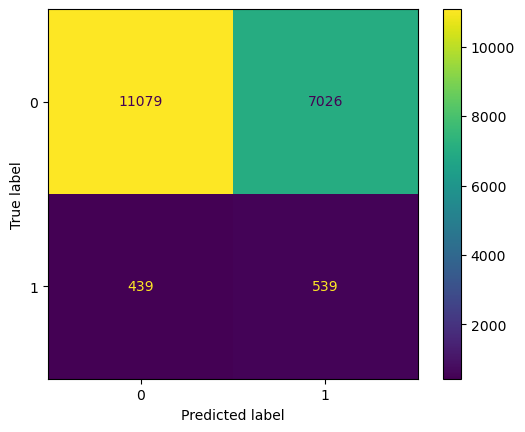

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

clf.fit(X_train_processed, y_train_resampled)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_processed, y_train_resampled)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_processed, y_test)))

y_test_pred = clf.predict(X_test_processed)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [112]:
# For cross validation
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=30,
                             min_samples_leaf =20)

cross_val_scores = cross_val_score(clf, X_train_processed, y_train_resampled, cv=10)

print("The mean Accuracy of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean Accuracy of the folds was 0.83


In [114]:
# Create the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=10)

# Define the parameter grid for GridSearchCV
param_grid = {
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

# Set up GridSearchCV with custom scoring
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    verbose=1
)

# Fit the model with GridSearchCV
grid_search.fit(X_train_processed, y_train_resampled)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [115]:
grid_search.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     18105
           1       0.08      0.33      0.13       978

    accuracy                           0.78     19083
   macro avg       0.52      0.56      0.50     19083
weighted avg       0.91      0.78      0.83     19083



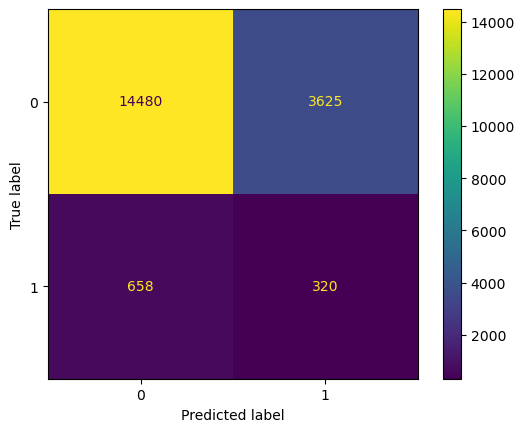

In [117]:
y_pred = best_model.predict(X_test_processed)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm_test = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=best_model.classes_)
disp.plot()